# UNIT 11 대중교통 데이터 시각화하기

In [7]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
# 예시삼아 pandas로 출력한 csv 파일
# 작업일시 데이터는 구글 스프레드시트로 삭제
pd.read_csv('C:/users/Admin/Downloads/subwayfee.csv')

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2021-03,1호선,1,서울역,"937,177","881,217","166,618","156,515"
1,2021-03,1호선,10,동묘앞,"125,653","136,688","146,045","148,410"
2,2021-03,1호선,2,시청,"468,162","470,800","63,279","61,083"
3,2021-03,1호선,3,종각,"764,393","731,560","113,573","106,197"
4,2021-03,1호선,4,종로3가,"428,232","386,982","265,195","248,906"
...,...,...,...,...,...,...,...,...
601,2021-03,우이신설선,708,북한산보국문,"124,202","115,469","37,748","38,567"
602,2021-03,우이신설선,709,정릉,"82,191","75,779","39,735","37,969"
603,2021-03,우이신설선,710,성신여대입구(돈암),"63,512","73,693","25,725","24,483"
604,2021-03,우이신설선,711,보문,"27,527","27,694","13,155","13,376"


In [83]:
# 유임승차 비율이 가장 높은 역 찾기
# cp949 인코딩에 에러가 나는 관계로 UTF-8로 인코딩
f = open('C:/Users/Admin/Downloads/subwayfee.csv',encoding='UTF-8')
data = csv.reader(f)
next(data)
maxrate = 0
rate = 0
maximum_station = ""
for row in data :
    for i in range(4,8):
        # 구글 스프레드시트로 쉼표 지우기에 실패해서 파이썬 코딩으로 직접 제거
        row[i] = int(row[i].replace(',',''))
    # 무임승차인원이 아무도 없고 전체 인원이 100000명 이상인 경우에만 비율 계산
    if row[6] != 0 and (row[4] + row[6]) > 100000 : 
        rate = row[4] / (row[4] + row[6]) # 비율 = 유임승차인원 / 전체승차인원
        if rate > maxrate :
            maxrate = rate
            maximum_station = row[1] + ' ' + row[3] # 지하철역 + 호선명

print('유임승차 비율이 가장 높은 역 :')
print(maximum_station + ' (' + str(round(maxrate * 100, 2)) + '%)')
f.close()

유임승차 비율이 가장 높은 역 :
2호선 한양대 (94.83%)


In [99]:
# 승하차 인원이 가장 많은 역 찾기
f = open('C:/Users/Admin/Downloads/subwayfee.csv',encoding='UTF-8')
data = csv.reader(f)
next(data)
maximum_people = [0, 0, 0, 0]
maximum_station = ['', '', '', '']
label = ['유임승차','유임하차','무임승차','무임하차']
for row in data :
    for i in range(4,8):
        row[i] = int(row[i].replace(',',''))
        if row[i] > maximum_people[i - 4] : # 각 승하차인원이 기존 최대 승하차인원보다 많다면
            maximum_people[i - 4] = row[i] # 최대 승하차인원을 갱신
            maximum_station[i - 4] = row[1] + ' ' + row[3] # 지하철역 + 호선명

for i in range(4) : 
    print(label[i], '승객 수가 가장 높은 역 :',
          maximum_station[i], '(' + str(maximum_people[i]) + '명)')
f.close()

유임승차 승객 수가 가장 높은 역 : 2호선 강남 (2079868명)
유임하차 승객 수가 가장 높은 역 : 2호선 강남 (2062016명)
무임승차 승객 수가 가장 높은 역 : 1호선 종로3가 (265195명)
무임하차 승객 수가 가장 높은 역 : 1호선 제기동 (271115명)



원하시는 역명을 입력해주세요.
모든 역의 유무임 승하차 비율을 알고싶다면 '전체'라고 입력해주세요.
영종
공항철도 1호선 영종역 유임승차 승객 수 : 65119명
공항철도 1호선 영종역 유임하차 승객 수 : 66034명
공항철도 1호선 영종역 무임승차 승객 수 : 16983명
공항철도 1호선 영종역 무임하차 승객 수 : 16999명


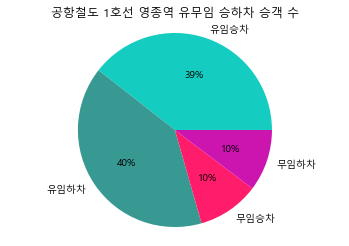

In [115]:
# 원하는 역의 유무임 승하차 비율 구하고 파이 차트 그림 저장하기
f = open('C:/Users/Admin/Downloads/subwayfee.csv',encoding='UTF-8')
data = csv.reader(f)
next(data)
people = [0, 0, 0, 0]
label = ['유임승차','유임하차','무임승차','무임하차']
station = input("""
원하시는 역명을 입력해주세요.
모든 역의 유무임 승하차 비율을 알고싶다면 '전체'라고 입력해주세요.
"""
)
full_name = '' # 호선과 역명을 합친 이름
for row in data :
    if station == row[3] : 
        for i in range(4,8):
            full_name = row[1] + ' ' + row[3] + '역'
            row[i] = int(row[i].replace(',',''))
            people[i - 4] += row[i] # 유무임 승하차 승객 수를 추가
    if station == '전체' : 
        for i in range(4,8):
            full_name = station
            row[i] = int(row[i].replace(',',''))
            people[i - 4] += row[i] # 유무임 승하차 승객 수를 계속 덧셈
for i in range(4) : 
    print(full_name, label[i], '승객 수 :', str(people[i]) + '명')

color = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
plt.title(full_name + ' 유무임 승하차 승객 수')
plt.rc('font', family = 'Malgun Gothic')
plt.pie(people, labels = label, colors = color, autopct = '%1.f%%')
plt.axis('equal')
plt.savefig(full_name+'.png') # 파이 차트 그림을 png로 저장
plt.show()
f.close()